## Lithium niobate dispersion

It is usual to model the dispersion of transparent optical materials with Sellmeier's equation:

$$
n^2(\lambda) = 1 + \sum_{k=1}^{m}{\frac{A_k \lambda^2}{\lambda^2 - B_k}},
$$

where we are modeling $m$ independent resonances. Writing this equation in terms of $\omega$ we get:

$$
n^2(\omega) = 1 + \sum_{k=1}^{m}{\frac{\omega_k^2}{\omega_k^2 - \omega^2} \chi_k^{(1)}},
$$

with:

$$
\chi_k^{(1)} = A_k \\
\omega_k = \frac{2\pi c}{\sqrt {B_k}}.
$$

Each one of these equations is the solution of Lorentz Equation:

$$
\frac{d^2P(t)}{dt^2} + \omega_k^2 P(t) = \epsilon_0 \omega_k^2 \, \chi_k^{(1)} E(t).
$$

## Units

For distance, let's use microns (the Sellmeier coefficients below are for microns).

For frequency, THz. This means time will be measured in ps, so the speed of light will be in um/ps

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0
c = c*1e-6

In [33]:
def term(A,B,wavelength):
    return A*wavelength**2/(wavelength**2-B)

def n_sq(Coeff,wavelength):
    n_sq = 1
    n_sq = n_sq + term(Coeff[0], Coeff[1], wavelength)
    n_sq = n_sq + term(Coeff[2], Coeff[3], wavelength)
    n_sq = n_sq + term(Coeff[4], Coeff[5], wavelength)
    return n_sq

def wterm(chi,wk,w):
    return chi*wk**2/(wk**2 - w**2)

def n_sq_w(Coeff,w):
    n_sq = 1
    n_sq = n_sq + wterm(Coeff[0], Coeff[1], w)
    n_sq = n_sq + wterm(Coeff[2], Coeff[3], w)
    n_sq = n_sq + wterm(Coeff[4], Coeff[5], w)
    return n_sq

def B_to_wk(B):
    return 2*pi*c/np.sqrt(B)

From this paper:

"Infrared corrected Sellmeier coefficients for
congruently grown lithium niobate
and 5 mol. % magnesium oxide–doped
lithium niobate"

Zelmon and Jundt

## Congruently grown LN (undoped)

In [34]:
#Coefficients from the paper

#Extraordinary waves
A_ne = 2.9804
B_ne = 0.02047
C_ne = 0.5981
D_ne = 0.0666
E_ne = 8.9543
F_ne = 416.08

#Ordinary waves
A_no = 2.6734
B_no = 0.01764
C_no = 1.2290
D_no = 0.05914
E_no = 12.614
F_no = 474.6

Text(0.5,1,'Congruently grown lithium niobate')

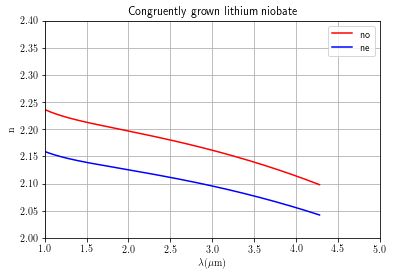

In [35]:
fstart = 70
fstop = 300
fstep = 1
f = np.arange(fstart, fstop+fstep, fstep)
w = 2*pi*f
wavelength = c/f

no_sq = n_sq([A_no,B_no,C_no,D_no,E_no,F_no],wavelength)
ne_sq = n_sq([A_ne,B_ne,C_ne,D_ne,E_ne,F_ne],wavelength)

Coeff_no_w = [A_no,B_to_wk(B_no),C_no,B_to_wk(D_no),E_no,B_to_wk(F_no)]
Coeff_ne_w = [A_ne,B_to_wk(B_ne),C_ne,B_to_wk(D_ne),E_ne,B_to_wk(F_ne)]
no_sq_w = n_sq_w(Coeff_no_w,w)
ne_sq_w = n_sq_w(Coeff_ne_w,w)

no = np.sqrt(no_sq)
ne = np.sqrt(ne_sq)
no_w = np.sqrt(no_sq_w)
ne_w = np.sqrt(ne_sq_w)

plt.plot(wavelength, no, 'r')
plt.plot(wavelength, ne, 'b')
plt.legend(['no','ne'])
plt.axis([1, 5, 2, 2.4])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown lithium niobate')

Text(0.5,1,'Congruently grown lithium niobate')

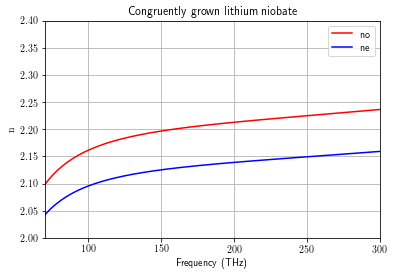

In [36]:
plt.plot(f, no_w, 'r')
plt.plot(f, ne_w, 'b')
plt.legend(['no','ne'])
plt.axis([70, 300, 2, 2.4])
plt.xlabel('Frequency (THz)')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown lithium niobate')

Text(0.5,1,'Congruently grown lithium niobate')

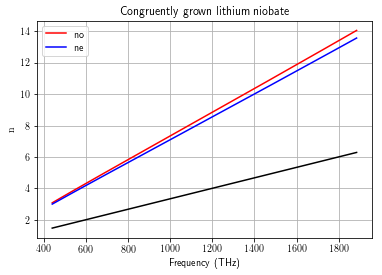

In [48]:
beta_no = w/c*no_w
beta_ne = w/c*ne_w
beta_air = w/c
plt.plot(w, beta_no, 'r')
plt.plot(w, beta_ne, 'b')
plt.plot(w, beta_air, 'k')
plt.legend(['no','ne'])
#plt.axis([70, 300, 2, 2.4])
plt.xlabel('Frequency (THz)')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown lithium niobate')

## First Derivative

$$
\beta = \frac{\omega}{c}n
$$
$$
\beta_1 = \frac{d\beta}{d\omega} = \frac{1}{c} \left( n + \omega \frac{dn}{d\omega} \right)
$$

We have from Sellmeier $n^2(\omega)$, let's call this $f(\omega)$, so we have:
$$
\frac{dn}{d\omega} = \frac{1}{2n} \frac{df}{d\omega}
$$

And:
$$
\frac{df}{d\omega} = \frac{d}{d\omega} \left( 1 + \sum_{k=1}^{m}{\frac{\omega_k^2}{\omega_k^2 - \omega^2} \chi_k^{(1)}} \right)
$$

$$
\frac{df}{d\omega} = \sum_{k=1}^{m}{\frac{2\omega}{\left( \omega_k^2 - \omega^2 \right)^2} \omega_k^2 \, \chi_k^{(1)} }
$$

In [37]:
def wdiff_term(chi,wk,w):
    return 2*w*chi*wk**2/(wk**2 - w**2)**2

def dfdw(Coeff, w):
    x = 0
    x = x + wdiff_term(Coeff[0], Coeff[1], w)
    x = x + wdiff_term(Coeff[2], Coeff[3], w)
    x = x + wdiff_term(Coeff[4], Coeff[5], w)
    return x

2.306919070678665


Text(0.5,1,'Congruently grown lithium niobate')

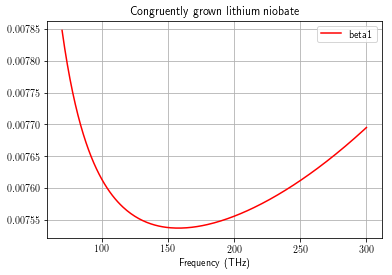

In [38]:
n = no_w
C = Coeff_no_w
dndw = 1/(2*n)*dfdw(C,w)
beta1 = (n + w*dndw)/c

vg = 1/beta1
ng = c/vg
print(ng[-1])

plt.plot(f, beta1, 'r')
plt.legend(['beta1'])
#plt.axis([70, 300, 0, 2.4])
plt.xlabel('Frequency (THz)')
#plt.ylabel('$\beta_1$')
plt.grid()
plt.title('Congruently grown lithium niobate')

## Second Derivative

$$
\beta = \frac{\omega}{c}n
$$
$$
\beta_1 = \frac{d\beta}{d\omega} = \frac{1}{c} \left( n + \omega \frac{dn}{d\omega} \right)
$$
$$
\beta_2 = \frac{d^2\beta}{d\omega^2} = \frac{1}{c} \left( 2\frac{dn}{d\omega} + \omega \frac{d^2n}{d\omega^2} \right)
$$

We have from Sellmeier $n^2(\omega)$, let's call this $f(\omega)$, so we have:
$$
\frac{dn}{d\omega} = \frac{1}{2n} \frac{df}{d\omega}
$$
$$
\frac{d^2n}{d\omega^2} = \frac{1}{2n} \frac{d^2f}{d\omega^2} - \frac{1}{4 n^3} \left( \frac{df}{d\omega} \right)^ 2
$$

And:
$$
\frac{df}{d\omega} = \frac{d}{d\omega} \left( 1 + \sum_{k=1}^{m}{\frac{\omega_k^2}{\omega_k^2 - \omega^2} \chi_k^{(1)}} \right)
$$

$$
\frac{df}{d\omega} = \sum_{k=1}^{m}{\frac{2\omega}{\left( \omega_k^2 - \omega^2 \right)^2} \omega_k^2 \, \chi_k^{(1)} }
$$

$$
\frac{d^2f}{d\omega^2} = \sum_{k=1}^{m}{\frac{2\left(\omega_k^2 + 3\omega^2 \right)}{\left( \omega_k^2 - \omega^2 \right)^3} \omega_k^2 \, \chi_k^{(1)} }
$$

In [40]:
def wdiff2_term(chi,wk,w):
    return 2*(wk**2 + 3*w**2)*chi*wk**2/(wk**2 - w**2)**3

def dfdw2(Coeff, w):
    x = 0
    x = x + wdiff2_term(Coeff[0], Coeff[1], w)
    x = x + wdiff2_term(Coeff[2], Coeff[3], w)
    x = x + wdiff2_term(Coeff[4], Coeff[5], w)
    return x

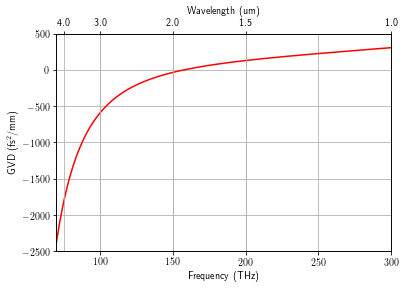

In [41]:
plt.rc('text', usetex=True)

dndw2 = 1/(2*n)*dfdw2(C,w) - 1/(4*n**3)*dfdw(C,w)**2
beta2 = (2*dndw + w*dndw2)/c #units are ps^2/um

gvd = beta2*1e9 #Changed to standard fs^2/mm

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(f, gvd, 'r')
ax1.axis([70, 300, -2500, 500])
ax1.set_xlabel('Frequency (THz)')
ax1.set_ylabel('GVD (fs$^2$/mm)')
ax1.grid()

wavelength_ticks = np.array([1,1.5,2,3,4])
new_tick_locations = c/wavelength_ticks
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(wavelength_ticks)
ax2.set_xlabel('Wavelength (um)')
ax2.grid()